#**Google Play Store Apps Analysis**

Problem Statement:

"What are the key factors that influence the success of Google Play Store apps in terms of user ratings, downloads, and revenue, and how can developers optimize these factors to enhance user engagement and profitability?"



# Apps Data


## Data Cleaning

First we imported important libraries


In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then we loaded our apps data file



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import App Data File
df = pd.read_csv('/content/drive/MyDrive/Anudip (Python )/googleplaystore.csv')

In [4]:
# Checked the Shape (Row, Coloumn) of our data
df.shape

(10841, 13)

Then we have checked the data to understand its structure and identify any issues such as missing values, duplicate data, incorrect data types, and many more.

In [5]:
# Print first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Gives information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Check for null values
pd.isnull(df).sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [8]:
# Fill null coloumns --> Forward filling method
df.fillna(method='ffill', inplace=True)

<ipython-input-8-ee059752b0da>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Checking if there is any duplicate row
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 474


In [10]:
# Removes duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# how many unique values are there
df.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


In [12]:
# cleaning Installs column (removing unwanted symbols or letters)
# remove + and comma(,) from the values

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) # removing +
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) # removing ,
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

<ipython-input-12-a726e75a9845>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(int)


In [13]:
# cleaning Price column (removing unwanted symbols or letters)
# removing $ sign

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x)) # converting into float

<ipython-input-13-117db8f139ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))


In [14]:
# cleaning Size column  (removing unwanted symbols or letters)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [15]:
# Cleaning review column (setting dtype)
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [16]:
# Again checking null values beacause above we have replaced values with NAN
pd.isnull(df).sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1526
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [17]:
# Again Filling null coloumns --> Forward filling
df.fillna(method='ffill', inplace=True)

<ipython-input-17-f743c70f49c8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
# After cleaning this is our final shape of data
df.shape

(10366, 13)

## Data Visulaization
Here, we have done Data Visualization using various plots and charts


## Count of Apps by Category
This code generates a countplot that shows the number of apps by category. From this plot, we can observe that the top 3 categories with the highest app counts are Family, Games, and Tools.

<ipython-input-20-3dbb5cc2f523>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Category"],palette=colors)


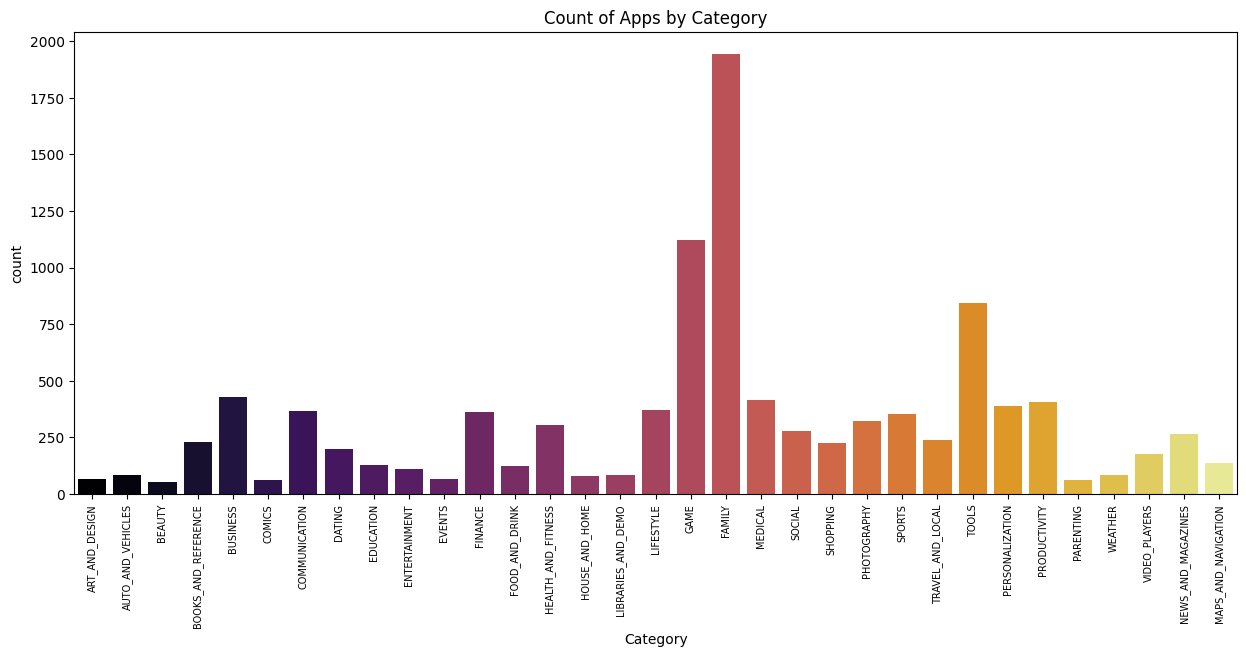

In [20]:
colormap = plt.get_cmap("inferno")
num_categories = df["Category"].nunique()
colors = [colormap(i / num_categories) for i in range(num_categories)]   # Generate list of colors

plt.figure(figsize=(15, 6))
sns.countplot(x = df["Category"],palette=colors)
plt.xticks(rotation=90, fontsize=7)
plt.title("Count of Apps by Category")
plt.show()

## Average of Rating
This code calculates and prints the average rating of apps from a dataset.


In [21]:
# Average of rating
avg = np.mean(df["Rating"])
print("Average rating of apps", round(avg,2))

Average rating of apps 4.19


## No. of Apps based on their Rating
This code generates douout chart which shows no. of apps based on thier rating. From this we can see that large no. of apps lies within the rating range 4 to 4.5.

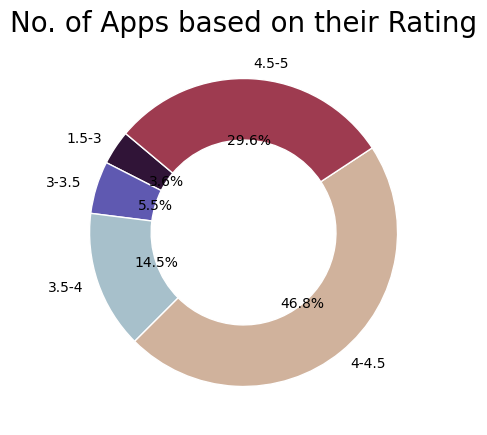

In [22]:
# Define labels and values
labels = ["1.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

values = [
    (df["Rating"] < 3).sum(),
    (df["Rating"] < 3.5).sum() - (df["Rating"] < 3).sum(),  # Subtract previous range
    (df["Rating"] < 4).sum() - (df["Rating"] < 3.5).sum(),
    (df["Rating"] < 4.5).sum() - (df["Rating"] < 4).sum(),
    (df["Rating"] < 5).sum() - (df["Rating"] < 4.5).sum()
]

# Colors for the chart
colormap = plt.get_cmap("twilight_shifted")
colors = [colormap(i / len(labels)) for i in range(len(labels))]

# Plot a pie chart with a hole in the middle (donut chart)
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4, edgecolor='white'))

# Set the title
plt.title("No. of Apps based on their Rating", fontsize=20)

# Show the plot
plt.show()


## No. of Top Genres
This code generates donout chart which shows top 10 genres.

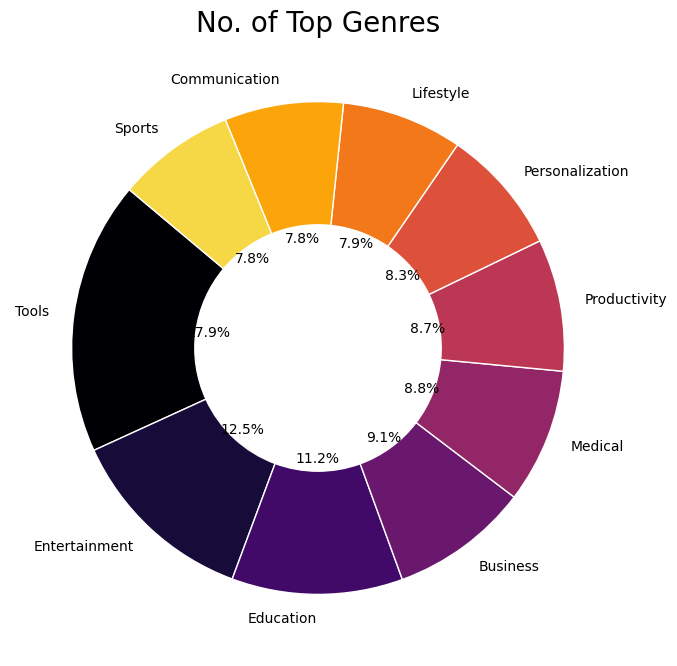

In [23]:
# Extract labels and values for the top 10 genres
labels = df["Genres"].value_counts()[:10].index
values = df["Genres"].value_counts()[:10]

# Get the 'inferno' colormap and generate colors based on the number of labels
colormap = plt.get_cmap("inferno")
colors = [colormap(i / len(labels)) for i in range(len(labels))]  # Generate list of colors

# Create a pie chart with a hole in the middle (donut chart)
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.45 , startangle=140,
        wedgeprops=dict(width=0.5, edgecolor='white'))  # Donut chart with white edges

# Set title for the chart
plt.title("No. of Top Genres", fontsize=20)

# Show the plot
plt.show()


## Count of Apps by Type (Free and Paid)
This code generates count plot which shows count of Apps according to thier type- free or paid. From this we can see count of free apps are more than paid apps.

<ipython-input-24-0b3bf417c598>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Type"], palette = "inferno")


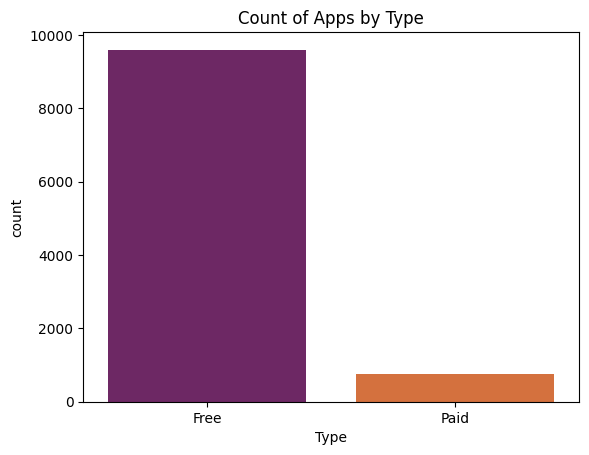

In [24]:
sns.countplot(x=df["Type"], palette = "inferno")
plt.title("Count of Apps by Type")
plt.show()

## Count of Apps by Content Rating based on Type
This code genrates a count plot to show the count of apps by Content Rating for each App Type.

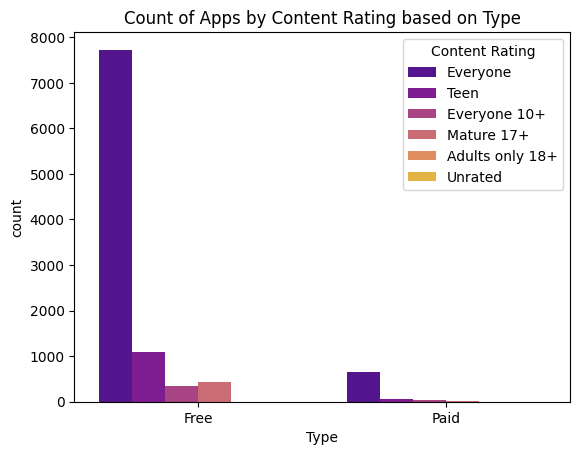

In [25]:
sns.countplot(x=df["Type"],hue=df["Content Rating"],palette = "plasma")
plt.title("Count of Apps by Content Rating based on Type")
plt.show()

## Count of Apps in Each Category by Type
This code genrates countplot which shows count of Apps in each Category by type. From this we can see top 3 Free type categories are family, games and tools. And top 3 Paid Apps are family, game and medical.

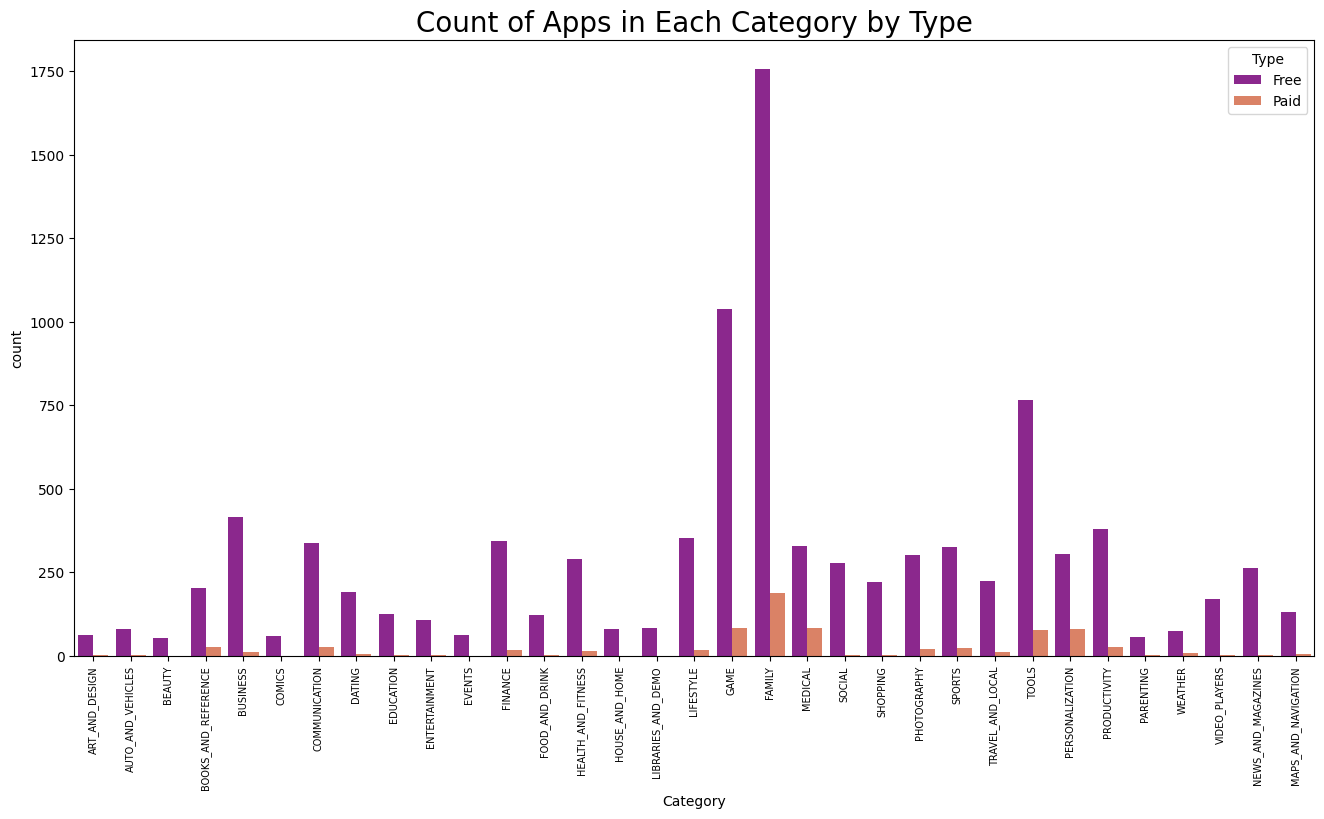

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x=df["Category"],hue=df["Type"], palette = "plasma")
plt.xticks(rotation=90, fontsize=7)
plt.title("Count of Apps in Each Category by Type", fontsize = 20)
plt.show()

#  Apps Review Data


## Data Cleaning

In [27]:
# Loading apps review data
ddf = pd.read_csv("/content/drive/MyDrive/Anudip (Python )/googleplaystore_user_reviews.csv")

In [28]:
# Check Shape of User Review data
ddf.shape

(64295, 5)

Then we have checked the data to understand its structure and identify any issues such as missing values, duplicate data, incorrect data types, and many more.

In [29]:
ddf.info()
# around 40% data is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [30]:
# checking uniques values
ddf.nunique()

,0
App,1074
Translated_Review,27994
Sentiment,3
Sentiment_Polarity,5410
Sentiment_Subjectivity,4474


In [31]:
# check how many null values are there
ddf.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [32]:
# droping null values
ddf.dropna(inplace=True)

In [33]:
# checking how many suplicates value are there
ddf.duplicated().sum()

7735

In [34]:
# droping duplicates value
ddf.drop_duplicates(inplace=True)

In [35]:
# Final shape of our data frame
ddf.shape

(29692, 5)

In [36]:
# now data is cleaned
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


## Data Visualization

## Count of Sentiment
This code generates countplot which shows distribution of sentiments (positive, negative and neutral) in the dataset. From this we can see there are lot of positive reviews.

<ipython-input-37-64ea527d0952>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ddf["Sentiment"], palette="plasma")


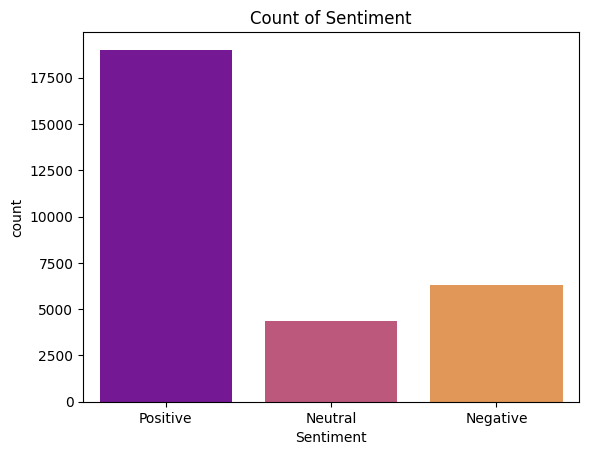

In [37]:
sns.countplot(x=ddf["Sentiment"], palette="plasma")
plt.title("Count of Sentiment")
plt.show()

## Sentiment Distribution: Subjectivity vs. Polarity
This code generates the scatter plot which shows relationship between sentiment subjectivity and sentiment polarity. From this we can see that user have more positive and negative subjective reviews.

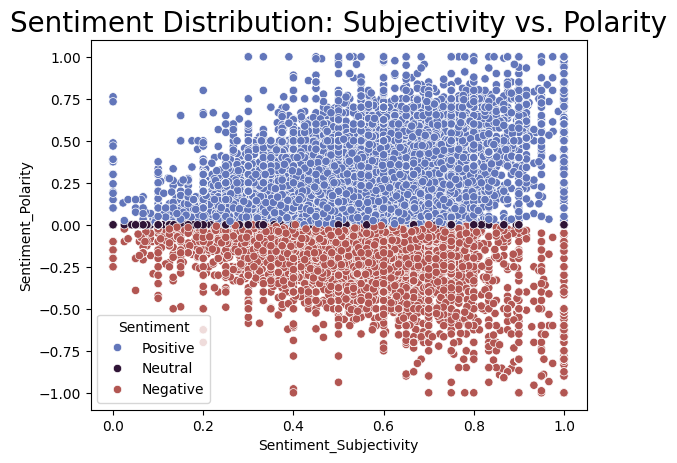

In [38]:
sns.scatterplot(x=ddf["Sentiment_Subjectivity"],y=ddf["Sentiment_Polarity"],
                hue=ddf["Sentiment"],palette="twilight")
plt.title("Sentiment Distribution: Subjectivity vs. Polarity", fontsize =20)
plt.show()

# Merging both data frames

In [39]:
# Now we are merging our app data and apps review data file and creating new file which is merged file
df_new = pd.merge(df,ddf,on="App",how="inner") # app column is common in both the tables
df_new.to_csv('merged_file.xlsx', index=False)

## Data Visualization

## Sentiment Distribution: Subjectivity vs. Polarity by Content Rating
This code generates scatter plot which shows the relationship between sentiment subjectivity and polarity based on content rating. From this we can see that content related to everyone have more positive and negative subjective reviews.

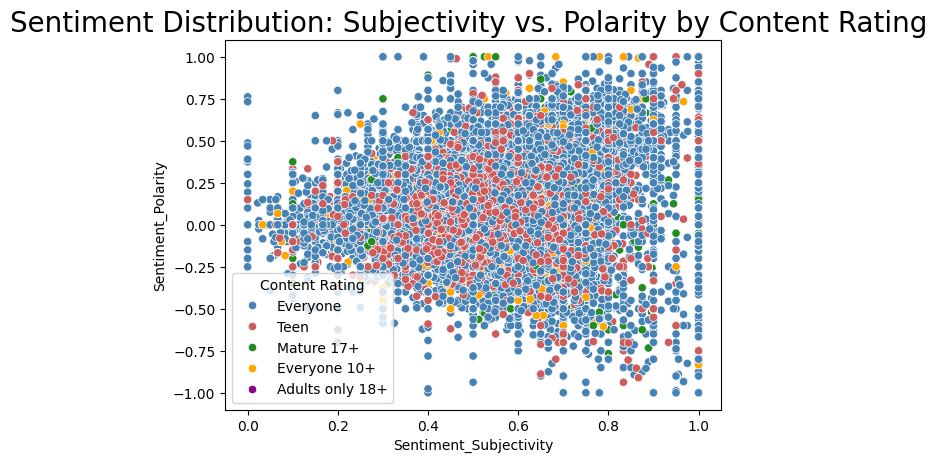

In [40]:
colors = ['steelblue','indianred','forestgreen','orange','darkmagenta']
sns.scatterplot(x=df_new["Sentiment_Subjectivity"],y=df_new["Sentiment_Polarity"],
                hue=df_new["Content Rating"], palette = colors)
plt.title("Sentiment Distribution: Subjectivity vs. Polarity by Content Rating ", fontsize =20)
plt.show()

## Sentiment Analysis by App Type
This code generates a countplot which shows senitment analysis by app type (free and paid). Here we can see that free apps have more positive reviews than paid apps.

Text(0.5, 1.0, 'Sentiment Analysis by App Type')

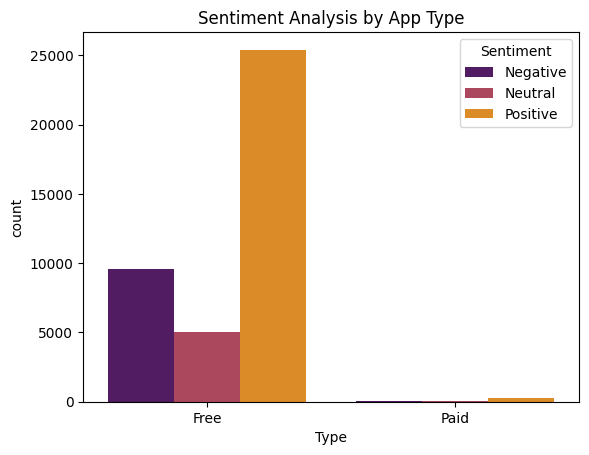

In [41]:
sns.countplot(hue=df_new["Sentiment"],x=df_new["Type"],palette = "inferno")
plt.title("Sentiment Analysis by App Type")

## Sentiment Analysis by App Category
This code generates a countplot which shows senitment analysis by app category.

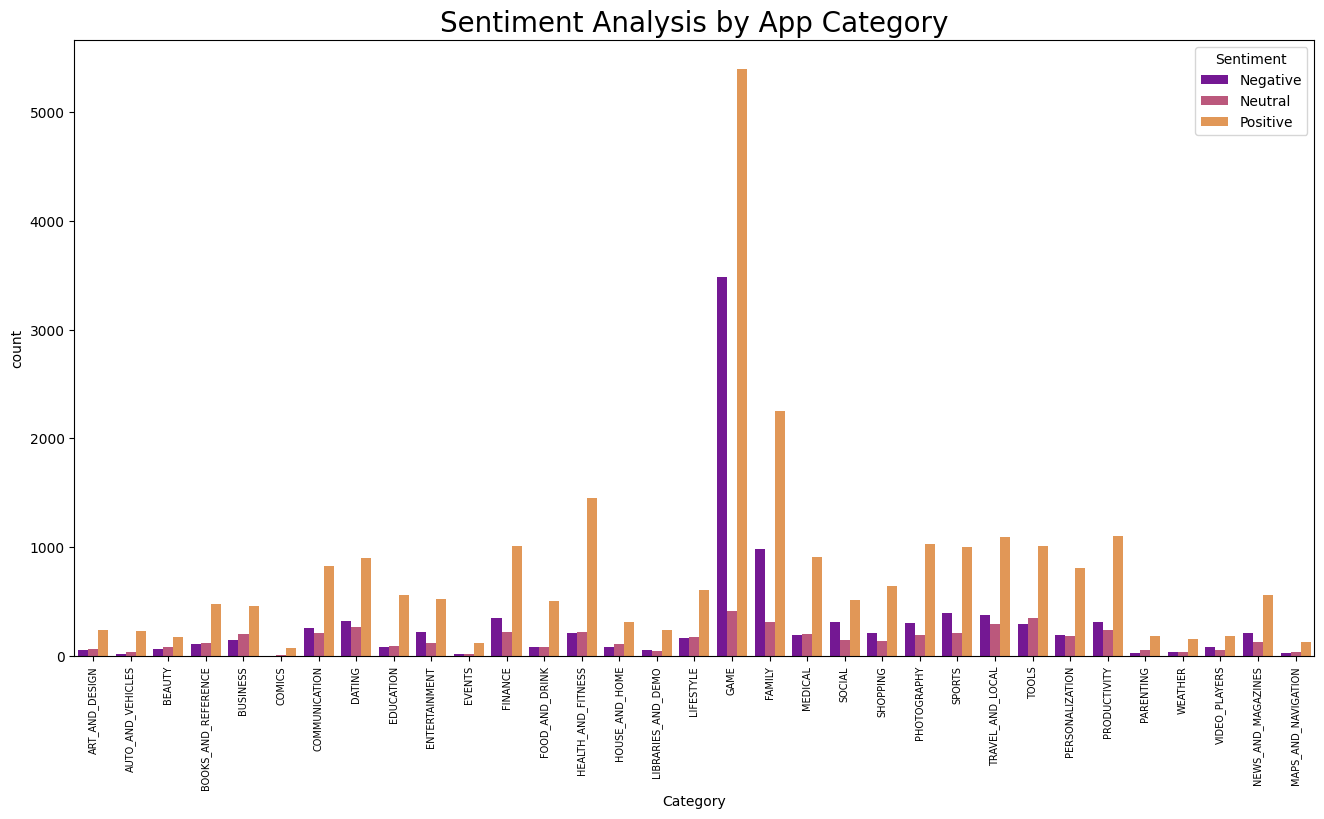

In [42]:
plt.figure(figsize=(16,8))
fig=sns.countplot(hue=df_new["Sentiment"],x=df_new["Category"], palette = "plasma")
plt.xticks(rotation=90, fontsize=7)
plt.title("Sentiment Analysis by App Category", fontsize = 20)
plt.show()